In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../data/raw_data/bondora_credit_risk_synthetic.csv")
data.head()

,application_id,application_date,country,age,gender,marital_status,dependents,employment_status,income_monthly,expenses_monthly,...,has_car_loan,loan_amount,loan_term_months,interest_rate,channel,device_trust_score,ip_risk_score,past_bondora_loans,past_bondora_good_standing,default_12m
0,12137,2022-06-16,ES,53,Other,divorced,1,employed_full_time,1433.71,1121.48,...,0,1492.28,60,12.28,mobile,0.832,0.382,1,0.0,0
1,16813,2024-06-22,NL,63,F,single,0,self_employed,2269.44,1960.91,...,0,1465.01,36,7.58,mobile,0.464,0.159,0,NaN,0
2,10073,2024-03-04,ES,28,F,divorced,1,employed_full_time,2013.61,1711.05,...,0,2945.74,36,12.80,mobile,0.833,0.325,0,NaN,0
3,5851,2024-03-13,EE,45,M,married,0,employed_full_time,815.01,532.33,...,0,1189.57,12,21.28,mobile,0.284,0.084,1,1.0,0
4,4321,2022-11-12,FI,21,M,single,2,employed_full_time,3519.90,1267.97,...,0,2145.30,60,13.76,web,0.529,0.133,1,1.0,0


In [43]:
data.dtypes

application_id                    int64
application_date                 object
country                          object
age                               int64
gender                           object
marital_status                   object
dependents                        int64
employment_status                object
income_monthly                  float64
expenses_monthly                float64
dti                             float64
utilization_proxy               float64
credit_history_length_months    float64
num_credit_lines                  int64
num_delinquencies_12m             int64
num_enquiries_3m                  int64
bureau_score                    float64
has_mortgage                      int64
has_car_loan                      int64
loan_amount                     float64
loan_term_months                  int64
interest_rate                   float64
channel                          object
device_trust_score              float64
ip_risk_score                   float64


## Missing value analysis

In [16]:
target = data['default_12m']
features = data.drop(columns=['default_12m', 'application_id'])

In [18]:
missing_values = (
    pd.DataFrame(data.isnull().sum()/len(data))
    .reset_index()
    .rename(columns={"index": "feature", 0: "missing_values"})
    .sort_values("missing_values", ascending=False)
    .query("missing_values > 0")
)
missing_values

,feature,missing_values
26,past_bondora_good_standing,0.77960
8,income_monthly,0.05560
9,expenses_monthly,0.01455
16,bureau_score,0.01010
12,credit_history_length_months,0.00910


### Checking past_pondora_good_standing against the target variable

In [20]:
data["past_bondora_good_standing"].value_counts()

past_bondora_good_standing
1.0    3668
0.0     740
Name: count, dtype: int64

<Axes: xlabel='default_12m', ylabel='past_bondora_good_standing'>

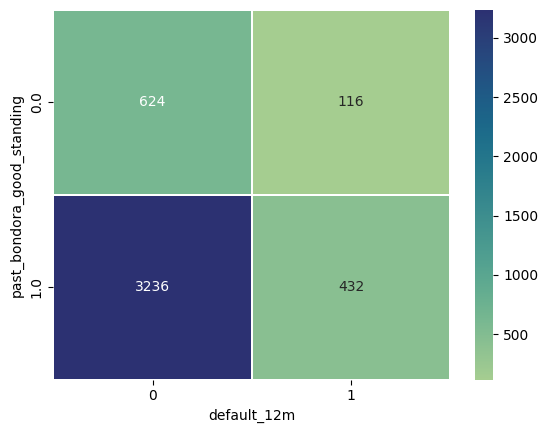

In [41]:
heatmap = (
    pd.DataFrame(data[["past_bondora_good_standing", "default_12m"]].value_counts())
    .reset_index()
    .pivot(index="past_bondora_good_standing", columns="default_12m", values="count")
)
sns.heatmap(heatmap,annot=True, linewidth=.1,fmt="d",cmap="crest")


In [ ]:
def fill_past_pondora_standing(data):
    return None


data["past_bondora_good_standing"]


0        0.0
1        NaN
2        NaN
3        1.0
4        1.0
        ... 
19995    NaN
19996    NaN
19997    1.0
19998    NaN
19999    NaN
Name: past_bondora_good_standing, Length: 20000, dtype: float64

In [ ]:
def impute_good_standing_missing_values(row):
    if pd.isnull(row['past_bondora_good_standing']):
        return 2
    else:
        return row['past_bondora_good_standing']
    

In [69]:
data["past_bondora_good_standing"] = data.apply(impute_missing_values, axis=1)

In [79]:
data.columns

Index(['application_id', 'application_date', 'country', 'age', 'gender',
       'marital_status', 'dependents', 'employment_status', 'income_monthly',
       'expenses_monthly', 'dti', 'utilization_proxy',
       'credit_history_length_months', 'num_credit_lines',
       'num_delinquencies_12m', 'num_enquiries_3m', 'bureau_score',
       'has_mortgage', 'has_car_loan', 'loan_amount', 'loan_term_months',
       'interest_rate', 'channel', 'device_trust_score', 'ip_risk_score',
       'past_bondora_loans', 'past_bondora_good_standing', 'default_12m'],
      dtype='object')

In [80]:
data["expenses_monthly"].value_counts()

expenses_monthly
200.00     650
634.87       4
534.63       3
1201.99      3
613.74       3
          ... 
1084.20      1
2046.41      1
535.97       1
1155.20      1
580.79       1
Name: count, Length: 18159, dtype: int64

In [81]:
from sklearn.impute import KNNImputer

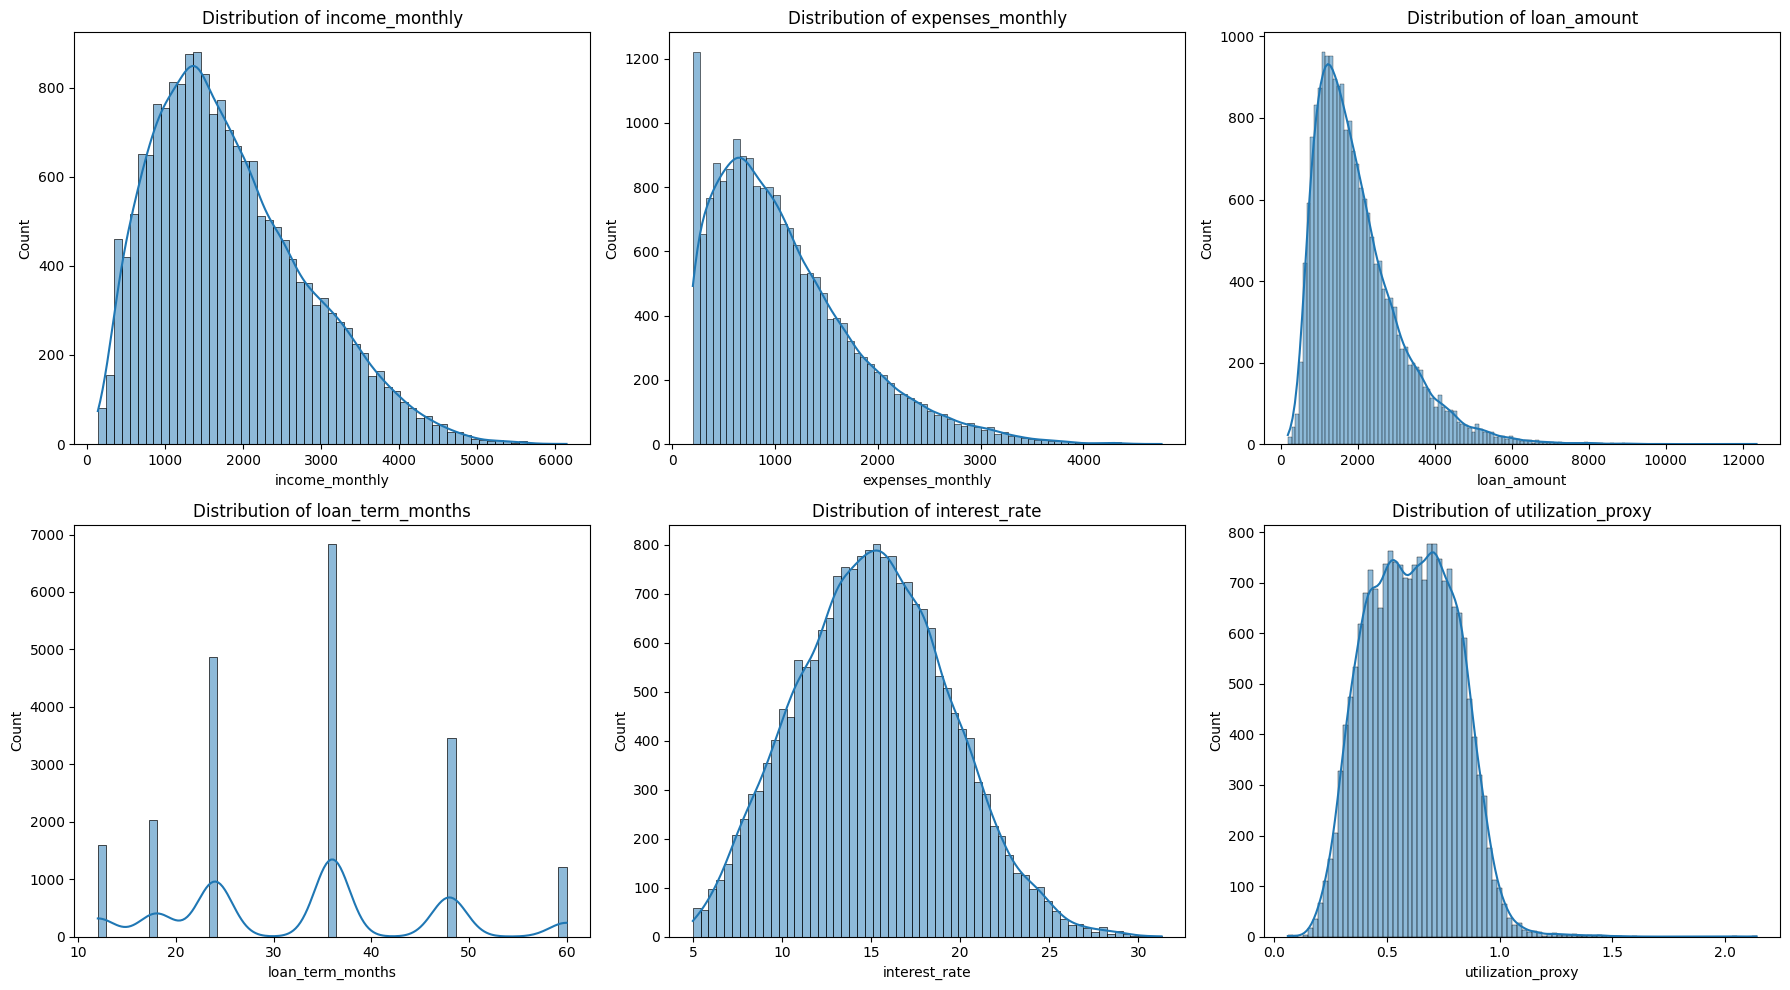

In [45]:
# Example: list of feature names
features = ['income_monthly', 'expenses_monthly', 'loan_amount',
            'loan_term_months', 'interest_rate', 'utilization_proxy']

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot distributions
for i, feature in enumerate(features):
    sns.histplot(data=data, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

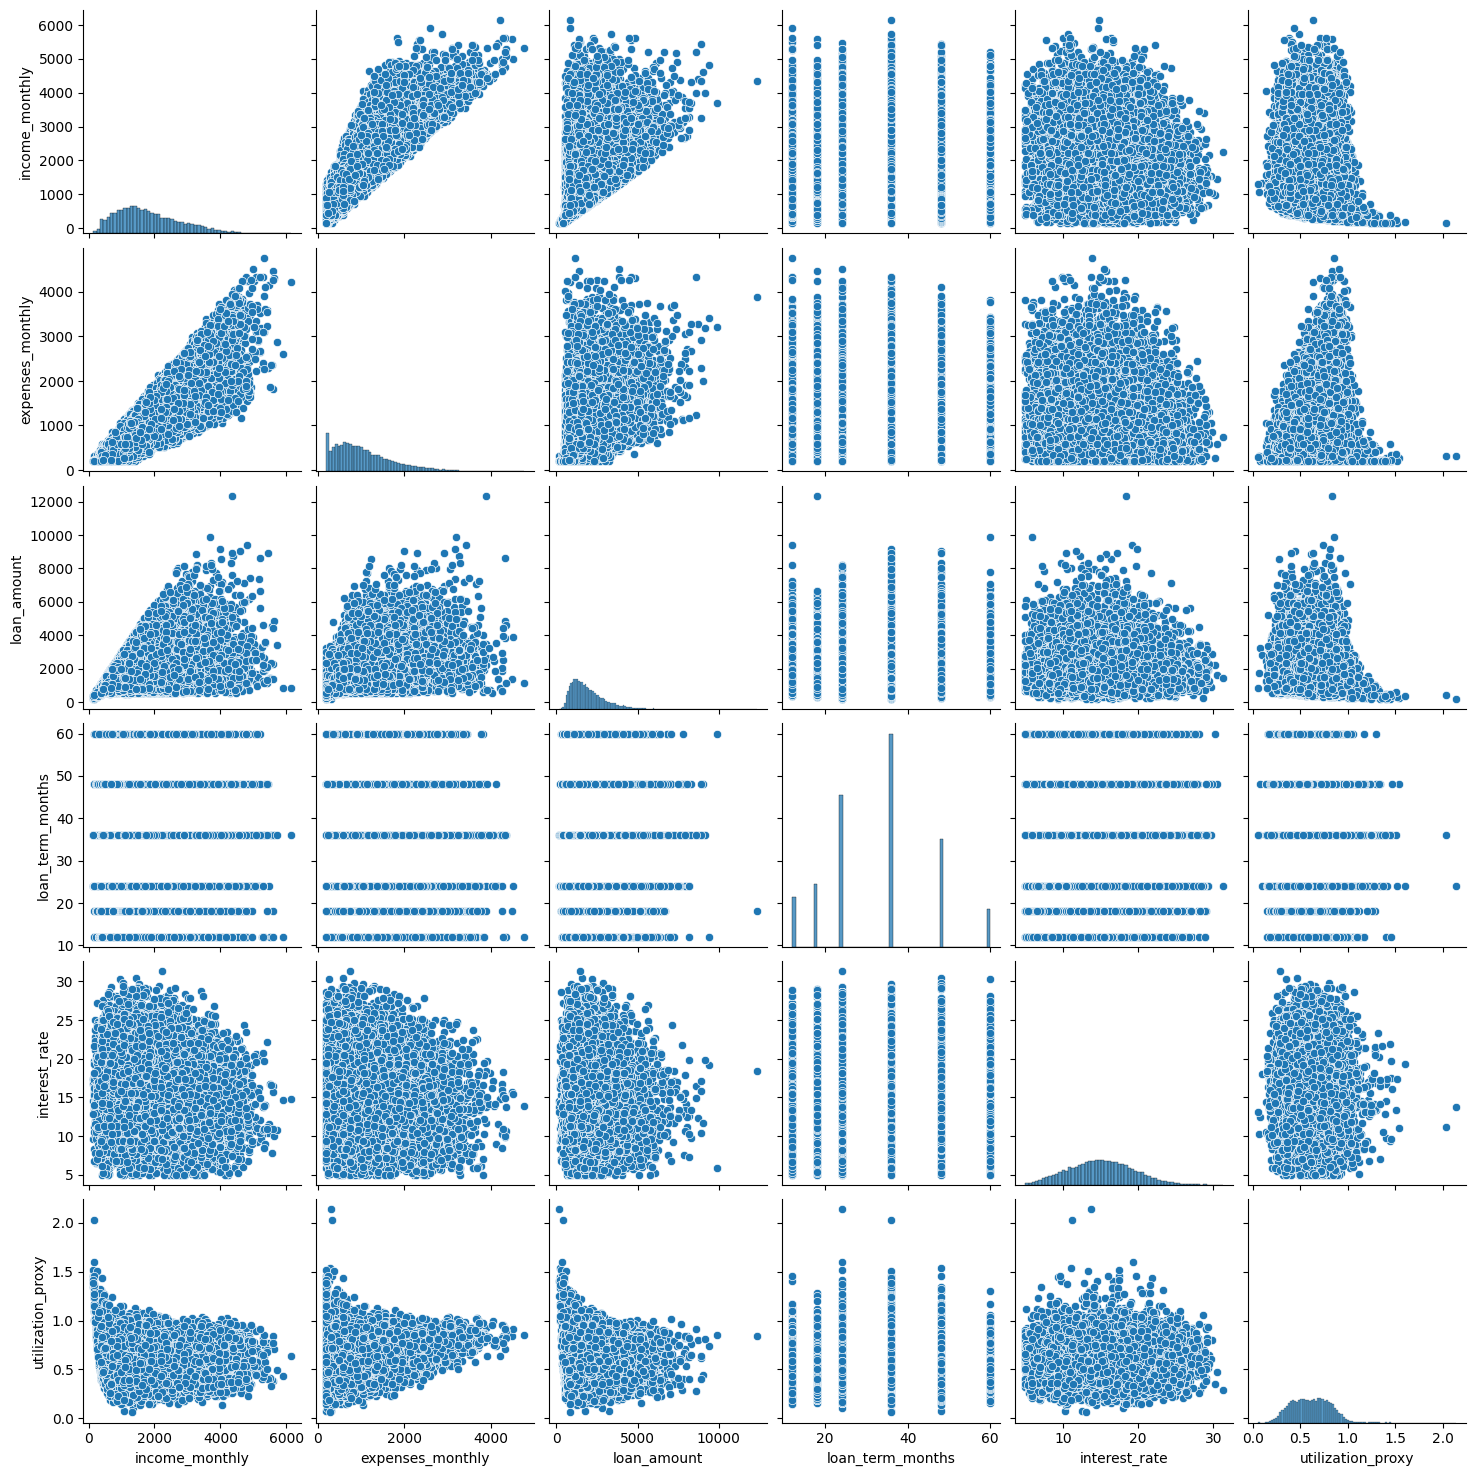

In [46]:
sns.pairplot(data[features])

### Outlier Analysis

In [31]:
import matplotlib.pyplot as plt

# Set the style
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot income_monthly
sns.histplot(data=data, x='income_monthly', kde=True, ax=axes[0])
axes[0].set_title('Distribution of Monthly Income')

# Plot expenses_monthly
sns.histplot(data=data, x='expenses_monthly', kde=True, ax=axes[1])
axes[1].set_title('Distribution of Monthly Expenses')

# Plot loan_amount
sns.histplot(data=data, x='loan_amount', kde=True, ax=axes[2])
axes[2].set_title('Distribution of Loan Amount')

plt.tight_layout()
plt.show()